In [41]:
## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder

In [43]:
df=pd.read_csv("adult_with_headers (1).csv")

In [ ]:
df.head() # returns the 1st 5 rows & columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info() # gives summary information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
### checks missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
### checks duplicates
df.duplicated().sum()

np.int64(24)

In [48]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [49]:
df.duplicated().sum()

np.int64(0)

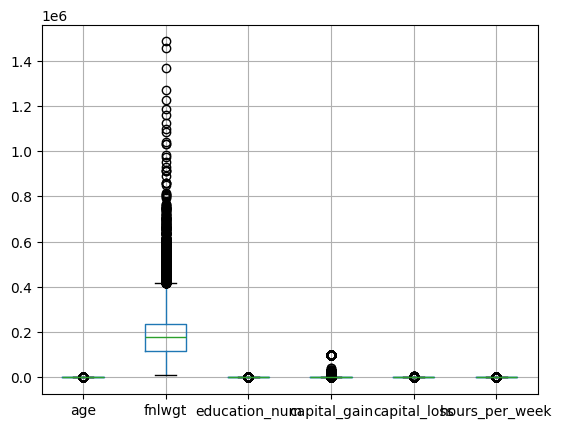

In [ ]:
df.boxplot() # to check the outliers 
plt.show()

In [51]:
#outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) 
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

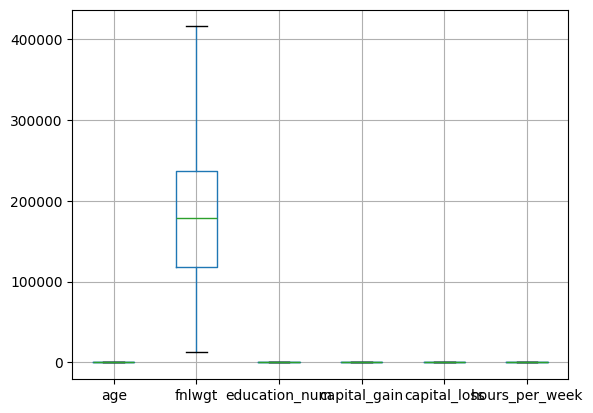

In [ ]:
df.boxplot() # to ensure that there are no outliers remaining
plt.show()

In [53]:
#apply scaling to numeric columns
#min max scalar,std scalar

In [54]:
scal_std=['age','fnlwgt']
scal_min_max=['education_num','hours_per_week','capital_gain','capital_loss']

In [55]:
std_sca=StandardScaler()
min_max_sca=MinMaxScaler()

In [56]:
df[scal_std]=std_sca.fit_transform(df[scal_std])

In [57]:
df[scal_min_max]=min_max_sca.fit_transform(df[scal_min_max])

In [ ]:
df.head() # returns 1st 5 rows & columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,0.375,United-States,<=50K
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.000,United-States,<=50K
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.375,United-States,<=50K
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.375,United-States,<=50K
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.375,Cuba,<=50K


In [59]:
#2.encoding techniques

In [60]:
#Apply One-Hot Encoding to categorical variables with less than 5 categories.
#sex has only two categories male and female

In [61]:
one_hot_enc=OneHotEncoder()

In [62]:
df_1=pd.DataFrame(one_hot_enc.fit_transform(df[['sex']]).toarray())

In [63]:
df_1.columns=['Female','Male']

In [64]:
df=pd.concat([df,df_1],axis=1)

In [65]:
df.drop(columns=['sex'],inplace=True)

In [66]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,<=50K,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,<=50K,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,<=50K,1.0,0.0


In [67]:
###### Use Label Encoding for categorical variables. Data Exploration and Preprocessing
#### Label Encoder is used if your target column is text and you have to convert it into numbers
#### Here the target value (income) is text and you have to convert it into numbers for classification

In [68]:
LE=LabelEncoder()

In [69]:
df['income']=LE.fit_transform(df['income'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0


In [70]:
#Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

In [71]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,Female,Male
count,3.253700e+04,3.253700e+04,32537.000000,32537.0,32537.0,32537.000000,32537.000000,32537.000000,32537.000000
mean,1.720834e-16,6.988157e-18,0.489145,0.0,0.0,0.435162,0.240926,0.330762,0.669238
std,1.000015e+00,1.000015e+00,0.213864,0.0,0.0,0.309368,0.427652,0.470495,0.470495
min,-1.590589e+00,-1.835009e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,-7.790584e-01,-7.254036e-01,0.391304,0.0,0.0,0.375000,0.000000,0.000000,0.000000
50%,-1.150790e-01,-8.903763e-02,0.478261,0.0,0.0,0.375000,0.000000,0.000000,1.000000
75%,6.964512e-01,5.274370e-01,0.652174,0.0,0.0,0.625000,0.000000,1.000000,1.000000
max,2.909716e+00,2.406698e+00,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [72]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
Female            0
Male              0
dtype: int64

In [73]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income              int64
Female            float64
Male              float64
dtype: object

In [74]:
# Feature Engineering:

In [ ]:
df.head() # returns the 1st 5 rows & columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0


In [76]:
df['capital_total'] = df['capital_gain'] - df['capital_loss']

In [77]:
df['is_self_employed'] = df['workclass'].apply(lambda x: 1 if 'Self-emp' in x else 0)

In [ ]:
df.head() # returns the 1st 5 rows & columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,capital_total,is_self_employed
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0,0.0,1
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0,0.0,0


In [79]:
df['log_transform_capital_gain'] = np.log1p(df['capital_gain'])

In [ ]:
df.head() # returns the 1st 5 rows & columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,capital_total,is_self_employed,log_transform_capital_gain
0,0.032472,State-gov,-1.149209,Bachelors,0.739130,Never-married,Adm-clerical,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0,0.0
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,0.739130,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,0.000,United-States,0,0.0,1.0,0.0,1,0.0
2,-0.041304,Private,0.303007,HS-grad,0.391304,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0,0.0
3,1.065329,Private,0.503550,11th,0.217391,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,0.375,United-States,0,0.0,1.0,0.0,0,0.0
4,-0.779058,Private,1.593665,Bachelors,0.739130,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,0.375,Cuba,0,1.0,0.0,0.0,0,0.0
